In [1]:
%matplotlib inline

import jsonlines
import numpy
import matplotlib.pyplot as plt
import os
import re

In [2]:
# Change here for your own path
input_dirpath = '../../data/echr/scraps'

In [3]:
def get_input_files(input_dirpath, pattern):
    """Returns the names of the files in input_dirpath that matches pattern."""
    all_files = os.listdir(input_dirpath)
    for filename in all_files:
        if re.match(pattern, filename) and os.path.isfile(os.path.join(
                input_dirpath, filename)):
            yield os.path.join(input_dirpath, filename)

In [4]:
# Statistics
sentence_number = []
word_number = []  # Only separated by split, not properly tokenized.

In [5]:
for input_filename in get_input_files(input_dirpath, r'.*jl'):
    print 'Processing file', input_filename
    with jsonlines.open(input_filename) as reader:
        for document in reader:
            sentence_number.append(len(document['sentences']))
            word_number.append([len(sentence.split()) for sentence in document['sentences']])

Processing file ../../data/echr/scraps/scraps-0.jl
Processing file ../../data/echr/scraps/scraps-1.jl


In [7]:
print "Total number of senteneces", sum(sentence_number)
print "Shortest document", numpy.min(sentence_number)
print "Longest document", numpy.max(sentence_number)
print "Average number of sentences per document", numpy.mean(sentence_number)
print "Standard deviation of number of sentences per document", numpy.std(sentence_number)

 Total number of senteneces 1691229
Shortest document 4
Longest document 3687
Average number of sentences per document 157.543455985
Standard deviation of number of sentences per document 133.912180372


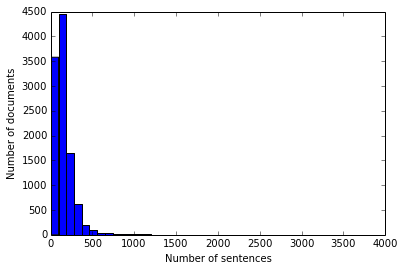

Between 4.0 and 96.075: 3580.00 (0.33)
Between 96.075 and 188.15: 4459.00 (0.42)
Between 188.15 and 280.225: 1649.00 (0.15)
Between 280.225 and 372.3: 612.00 (0.06)
Between 372.3 and 464.375: 188.00 (0.02)
Between 464.375 and 556.45: 90.00 (0.01)


In [49]:
n, bins, patches = plt.hist(sentence_number, 40)

plt.ylabel('Number of documents')
plt.xlabel('Number of sentences')
plt.show()

total = len(sentence_number)
for index in range(1, len(bins)):
    if n[index-1]/float(total) > 0.005:
        print ' '.join(('Between {} and {}:'.format(bins[index-1], bins[index]),
                        '{0:.2f}'.format(n[index-1]),
                        '({0:.2f})'.format(n[index-1]/float(total))))

In [9]:
word_number_by_doc = [sum(words_by_sentence) for words_by_sentence in word_number]
print "Total number of words", sum(word_number_by_doc)
print "Average number of words per document", numpy.mean(word_number_by_doc)
print "Standard deviation of number of sentences per document", numpy.std(word_number_by_doc)

Total number of words 71296280
Average number of words per document 6641.4792734
Standard deviation of number of sentences per document 6636.68282881


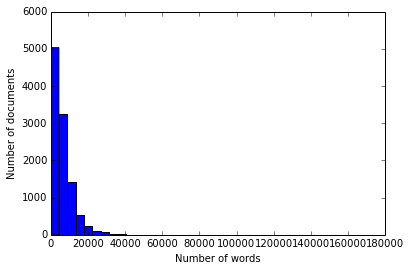

Between 17.0 and 4496.6: 5030.00 (0.47)
Between 4496.6 and 8976.2: 3246.00 (0.30)
Between 8976.2 and 13455.8: 1411.00 (0.13)
Between 13455.8 and 17935.4: 527.00 (0.05)
Between 17935.4 and 22415.0: 244.00 (0.02)
Between 22415.0 and 26894.6: 108.00 (0.01)
Between 26894.6 and 31374.2: 68.00 (0.01)


In [50]:
n, bins, patches = plt.hist(word_number_by_doc, 40)

plt.ylabel('Number of documents')
plt.xlabel('Number of words')
plt.show()

total = len(sentence_number)
for index in range(1, len(bins)):
    if n[index-1]/float(total) > 0.005:
        print ' '.join(('Between {} and {}:'.format(bins[index-1], bins[index]),
                        '{0:.2f}'.format(n[index-1]),
                        '({0:.2f})'.format(n[index-1]/float(total))))